In [1]:
!pip install pypi-install
!pip install matplotlib
!pip install uk_covid19
!pip install ipywidgets
!pip install voila

In [2]:
from uk_covid19 import Cov19API
import json
import numpy as np
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt
    

In [3]:
filters = ['areaType=overview']
structure = {"date":"date","vaxxed":"cumPeopleVaccinatedSecondDoseByPublishDate","Vbeds":"covidOccupiedMVBeds","deaths":"cumDeaths28DaysByPublishDate"}



In [4]:
api = Cov19API(filters=filters, structure=structure)
timeseries=api.get_json()
print(timeseries)
print(type(timeseries))

{'data': [{'date': '2022-09-11', 'vaxxed': 50762968, 'Vbeds': None, 'deaths': None}, {'date': '2022-09-10', 'vaxxed': 50760564, 'Vbeds': None, 'deaths': None}, {'date': '2022-09-09', 'vaxxed': 50754555, 'Vbeds': None, 'deaths': None}, {'date': '2022-09-08', 'vaxxed': 50752513, 'Vbeds': None, 'deaths': None}, {'date': '2022-09-07', 'vaxxed': 50750722, 'Vbeds': None, 'deaths': None}, {'date': '2022-09-06', 'vaxxed': 50749294, 'Vbeds': None, 'deaths': None}, {'date': '2022-09-05', 'vaxxed': 50747621, 'Vbeds': None, 'deaths': None}, {'date': '2022-09-04', 'vaxxed': 50745901, 'Vbeds': None, 'deaths': None}, {'date': '2022-09-03', 'vaxxed': 50742774, 'Vbeds': None, 'deaths': None}, {'date': '2022-09-02', 'vaxxed': 50734844, 'Vbeds': None, 'deaths': None}, {'date': '2022-09-01', 'vaxxed': 50731629, 'Vbeds': None, 'deaths': None}, {'date': '2022-08-31', 'vaxxed': 50727968, 'Vbeds': None, 'deaths': None}, {'date': '2022-08-30', 'vaxxed': 50721773, 'Vbeds': None, 'deaths': None}, {'date': '2022-

In [5]:
import json
with open("timeseries.json", "wt") as OUTF:
    json.dump(timeseries, OUTF)
    

In [6]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
with open("timeseries.json", "rt") as INFILE:
    data=json.load(INFILE)
data

{'data': [{'date': '2022-09-11',
   'vaxxed': 50762968,
   'Vbeds': None,
   'deaths': None},
  {'date': '2022-09-10', 'vaxxed': 50760564, 'Vbeds': None, 'deaths': None},
  {'date': '2022-09-09', 'vaxxed': 50754555, 'Vbeds': None, 'deaths': None},
  {'date': '2022-09-08', 'vaxxed': 50752513, 'Vbeds': None, 'deaths': None},
  {'date': '2022-09-07', 'vaxxed': 50750722, 'Vbeds': None, 'deaths': None},
  {'date': '2022-09-06', 'vaxxed': 50749294, 'Vbeds': None, 'deaths': None},
  {'date': '2022-09-05', 'vaxxed': 50747621, 'Vbeds': None, 'deaths': None},
  {'date': '2022-09-04', 'vaxxed': 50745901, 'Vbeds': None, 'deaths': None},
  {'date': '2022-09-03', 'vaxxed': 50742774, 'Vbeds': None, 'deaths': None},
  {'date': '2022-09-02', 'vaxxed': 50734844, 'Vbeds': None, 'deaths': None},
  {'date': '2022-09-01', 'vaxxed': 50731629, 'Vbeds': None, 'deaths': None},
  {'date': '2022-08-31', 'vaxxed': 50727968, 'Vbeds': None, 'deaths': None},
  {'date': '2022-08-30', 'vaxxed': 50721773, 'Vbeds': None,

In [7]:
datalist=data['data']
datalist
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()
dates


['2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-12',
 '2020-04-13',
 '2020-04-14',
 '2020-04-15',
 '2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-04-20',
 '2020-04-21',
 '2020-04-22',
 '2020-04-23',
 '2020-04-24',
 '2020-04-25',
 '2020-04-26',
 '2020-04-27',
 '2020-04-28',
 '2020-04-29',
 '2020-04-30',
 '2020-05-01',
 '2020-05-02',
 '2020-05-03',
 '2020-05-04',
 '2020-05-05',
 '2020-05-06',
 '2020-05-07',
 '2020-05-08',
 '2020-05-09',
 '2020-05-10',
 '2020-05-

In [8]:
def parse_date(datestring):
    return pd.to_datetime(datestring, format="%Y-%m-%d")
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print (startdate, ' to ', enddate)

2020-03-06 00:00:00  to  2022-09-11 00:00:00


In [9]:
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['vaxxed', 'Vbeds', 'deaths'])
timeseriesdf

,vaxxed,Vbeds,deaths
2020-03-06,NaN,NaN,NaN
2020-03-07,NaN,NaN,NaN
2020-03-08,NaN,NaN,NaN
2020-03-09,NaN,NaN,NaN
2020-03-10,NaN,NaN,NaN
...,...,...,...
2022-09-07,NaN,NaN,NaN
2022-09-08,NaN,NaN,NaN
2022-09-09,NaN,NaN,NaN
2022-09-10,NaN,NaN,NaN


In [10]:
for entry in datalist: 
    date=parse_date(entry['date'])
    for column in ['vaxxed', 'Vbeds', 'deaths']:
        if pd.isna(timeseriesdf.loc[date, column]): 
            value= float(entry[column]) if entry[column]!=None else 0.0
            timeseriesdf.loc[date, column]=value

            
timeseriesdf.fillna(0.0, inplace=True)         
timeseriesdf

,vaxxed,Vbeds,deaths
2020-03-06,0.0,0.0,1.0
2020-03-07,0.0,0.0,2.0
2020-03-08,0.0,0.0,2.0
2020-03-09,0.0,0.0,3.0
2020-03-10,0.0,0.0,7.0
...,...,...,...
2022-09-07,50750722.0,0.0,0.0
2022-09-08,50752513.0,0.0,0.0
2022-09-09,50754555.0,0.0,0.0
2022-09-10,50760564.0,0.0,0.0


<AxesSubplot:>

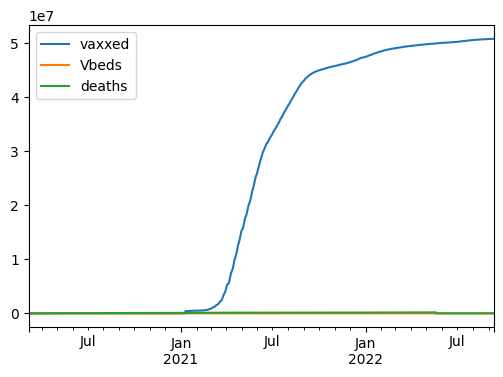

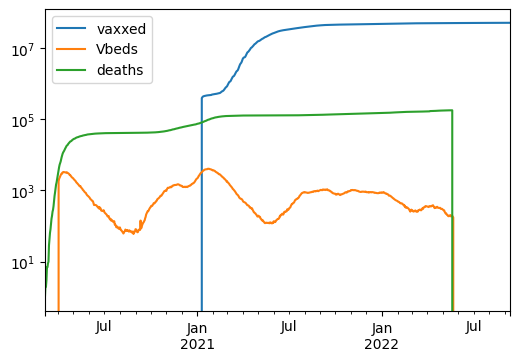

In [11]:
timeseriesdf.plot()
timeseriesdf.plot(logy=True)

In [12]:
timeseriesdf.to_pickle("timeseriesdf.pkl")

In [13]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [14]:
def access_api(button):    

    apibutton.icon="check"
    apibutton.disabled=True

apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='', 
    tooltip='Click to download current Public Health England data',
    icon='download')

apibutton.on_click(access_api)
display(apibutton)

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

In [15]:
timeseriesdf=pd.read_pickle("timeseriesdf.pkl")


In [16]:
series=wdg.SelectMultiple(
    options=['vaxxed', 'Vbeds', 'deaths'],
    value=['vaxxed', 'Vbeds', 'deaths'], 
    rows=3, 
    description='Stats:', 
    disabled=False)

scale=wdg.RadioButtons(options=['linear', 'log'], description='Scale:', disabled=False)


controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
        plt.show() 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Output()

In [17]:
ctrls=wdg.VBox([series, scale])

form=wdg.HBox([graph, ctrls])

display(form)

In [18]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [19]:
jsondata={}
def wrangle_data(rawdata):
    df=pd.DataFrame(index=range(0,10000000), columns=['Vaxxed', 'Vbeds', 'deaths'])
    vaxxed=Vbeds=deaths=0.0
    for i in range(0,100):
        df.loc[i,'vaxxed']=vaxxed
        df.loc[i,'Vbeds']=Vbeds
        df.loc[i,'deaths']=deaths
        one+=np.random.randn()
        two+=2*np.random.randn()
        three+=3*np.random.randn()
    return df
df=wrangle_data(jsondata)

UnboundLocalError: local variable 'one' referenced before assignment

In [ ]:
def access_api():
    return {}

In [ ]:
def api_button_callback(button):
    apidata=access_api()
    global df
    df=wrangle_data(apidata)
 
    refresh_graph()
 
    apibutton.icon="check"
    
apibutton=wdg.Button(
    description='Improvment',
    disabled=False,
    button_style='', 
    tooltip="On the path to normality",
    icon='exclamation-triangle')

apibutton.on_click(api_button_callback)

display(apibutton)

In [ ]:
def Covid_situation(covid):
    df[covid].plot()
    plt.show() 
    
whichVariable=wdg.Dropdown(
    options=['vaxxed', 'Vbeds', 'deaths'],
    value='vaxxed',
    description='Choose variable: ',
    disabled=False,)

def refresh_graph():
   
    current=whichVariable.value
    if current==whichVariable.options[0]:
        other1=whichVariable.options[1]
        other2=whichVariable.options[2]
    else:
        other=whichVariable.options[0]
    whichVariable.value=other 
    whichVariable.value=current 
    
    
graph=wdg.interactive_output(Covid_situation, {'covid': whichVariable})
    
display(whichVariable, graph)